In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import urllib
from PIL import Image
from bs4 import BeautifulSoup
import requests
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pickle
from collections import Counter
movie_df = pd.read_csv("shuffled_movie_df.csv")
pickle.dump(movie_df, open("shuffled_movie_df.pkl", "wb"))
pickle_movie = pickle.load(open("shuffled_movie_df.pkl", "rb"))
movie_df.head()
pickle_movie.head()

,Movie Name,Poster Image Link,Synopsis,Genre,IMDb_id,Plot Keywords,Storyline,Genre Variations
0,Big Fish,https://m.media-amazon.com/images/M/MV5BMTYyMz...,A frustrated son tries to determine the fa...,Adventure,tt0319061,fish father son relationship death of father f...,United Press International journalist Will...,Adventure Drama Fantasy
1,Scott Pilgrim vs. the World,https://m.media-amazon.com/images/M/MV5BMTkwNT...,Scott Pilgrim must defeat his new girlfrie...,Action,tt0446029,toronto canada sexy woman cleavage panties sca...,Scott Pilgrim plays in a band which aspire...,Action Comedy Fantasy
2,The Paleface,https://m.media-amazon.com/images/M/MV5BOGZhMG...,Calamity Jane is despatched to find out wh...,Western,tt0040679,comedy of errors misunderstanding punched in t...,Someone is selling guns to the Indians and...,Comedy Family Western
3,How the West Was Won,https://m.media-amazon.com/images/M/MV5BNTk2ND...,A family saga covering several decades of ...,Western,tt0056085,ulysses s. grant character abraham lincoln cha...,Setting off on a journey to the west in th...,Western
4,The Butterfly Effect,https://m.media-amazon.com/images/M/MV5BODNiZm...,Evan Treborn suffers blackouts during sign...,Sci-Fi,tt0289879,love butterfly effect child pornography time t...,Evan Treborn grows up in a small town with...,Drama Sci-Fi Thriller


In [2]:
movie_df["Plot Keywords"].fillna("",inplace=True)

# File Summary
This file contains exploring the relationship between plot keywords identified by IMDb for a movie and its genre.

# Most Common Plot Keywords in Horror
Below, I am finding the popular plot keywords that occur in horror movies.

In [3]:
horror_movies_df = movie_df[movie_df["Genre"] == "Horror"]

bag_of_words_horror = (
    horror_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_horror = pd.DataFrame(list(bag_of_words_horror)).fillna(0)
tf_horror.sum().sort_values()[-15:]

survival         6.0
by               7.0
girl             7.0
death            8.0
the              8.0
character        8.0
dead             9.0
horror          10.0
relationship    10.0
nudity          11.0
female          15.0
of              16.0
woman           17.0
a               22.0
in              23.0
dtype: float64

According to this TF for horror movies above, it seems like the most common keywords (if we take out common words like "the", "and", etc.) in the horror movie plot keywords are: "woman", "nudity", "horror" , "dead", "death"

In [4]:
common_horrorwords = ["woman", "nudity", "horror" , "dead", "death"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_horrorwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter

Common Horror Plot keyords: woman, nudity, horror,dead, death


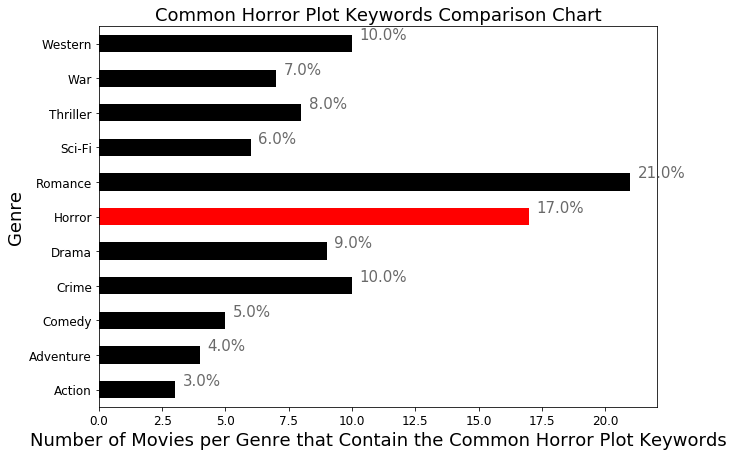

In [5]:
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Horror Plot keyords: woman, nudity, horror,"+ 
      "dead, death"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","red",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Horror Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Horror Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for horror movie plot keywords, we were able to look and see what keywords were most common in the horror movies plot keywords. Once we received the most common horror plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, these words occured most inn Romance movies with 21%. However, 17% of the horror movies contain common horror keywords in their keywords.

# Most Common Plot Keywords in Action
Below, I am finding the popular plot keywords that occur in action movies.

In [6]:
action_movies_df = movie_df[movie_df["Genre"] == "Action"]

bag_of_words_action = (
    action_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_action = pd.DataFrame(list(bag_of_words_action)).fillna(0)
tf_action.sum().sort_values()[-15:]

versus        6.0
arizona       6.0
evil          6.0
secret        6.0
reference     7.0
to            7.0
of            7.0
war           7.0
assassin      7.0
man           7.0
the           8.0
police        8.0
time          8.0
female       12.0
character    18.0
dtype: float64

According to this TF for action movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the action movie plot keywords are: "police", "assassin", "secret", "evil", "versus"

Common Action plot Keywords: police, assassin, secret, evil, versus


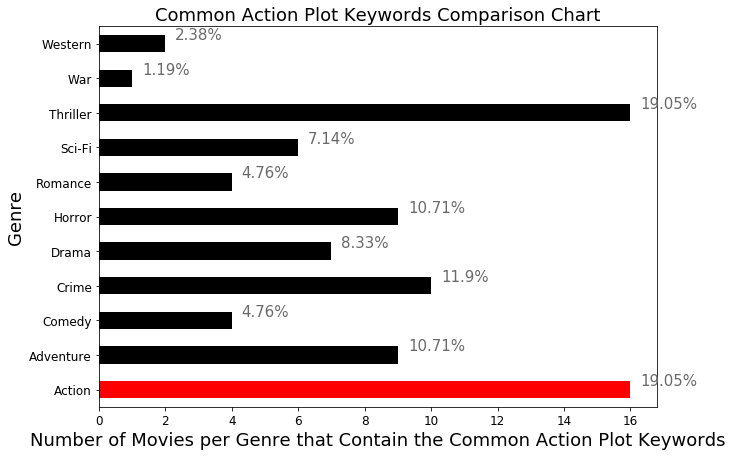

In [7]:
common_actionwords = ["police", "assassin", "secret", "evil", "versus"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_actionwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Action plot Keywords: police, assassin, secret, evil, versus"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["red","black","black","black","black","black",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Action Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Action Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for action movie plot keywords, we were able to look and see what keywords were most common in the action movie plot keywords. Once we received the most common action plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, these common action plot keywords occur highest in both Action and Thriller. This may mean it is hard to predict action movies correctly solely based on keywords.

# Most Plot Keywords in Western
Below, I am finding the popular plot keywords that occur in western movies.

In [8]:
western_movies_df = movie_df[movie_df["Genre"] == "Western"]

bag_of_words_western = (
    western_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_western = pd.DataFrame(list(bag_of_words_western)).fillna(0)
tf_western.sum().sort_values()[-15:]

cowboy        9.0
indian       11.0
film         11.0
national     11.0
the          11.0
american     11.0
desert       11.0
a            11.0
in           13.0
apache       14.0
mexico       15.0
gun          18.0
holster      20.0
territory    27.0
arizona      57.0
dtype: float64

According to this TF for western movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the western movie plot keywords are: "arizona", "territory", "holster", "mexico", "gun"

Common Western plot Keywords: arizona, territory, holster, mexico, gun


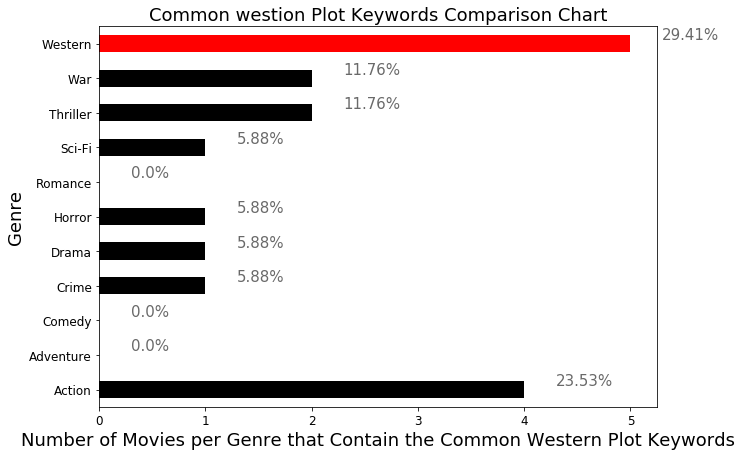

In [9]:
common_westernwords = ["arizona", "territory", "holster", "mexico", "gun"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_westernwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Western plot Keywords: arizona, territory, holster, mexico, gun" +end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","black","red"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Western Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common westion Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for western movie plot keywords, we were able to look and see what keywords were most common in the western movie plot keywords. Once we received the most common western plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common western plot keywords occur mostly in Western movies, as expected.

# Most Plot Keywords in Adventure
Below, I am finding the popular plot keywords that occur in adventure movies.

In [10]:
adv_movies_df = movie_df[movie_df["Genre"] == "Adventure"]

bag_of_words_adv = (
    adv_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_adv = pd.DataFrame(list(bag_of_words_adv)).fillna(0)
tf_adv.sum().sort_values()[-15:]

film          4.0
war           5.0
wizard        6.0
good          6.0
arizona       6.0
survival      6.0
versus        7.0
evil          7.0
based         8.0
female        8.0
time          8.0
of            9.0
the           9.0
on           12.0
character    31.0
dtype: float64

According to this TF for adventure movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the adventure movie plot keywords are: "based", "based", "time", "survival", "wizard"

Common Adventure plot Keywords: based, female, time, survival, wizard


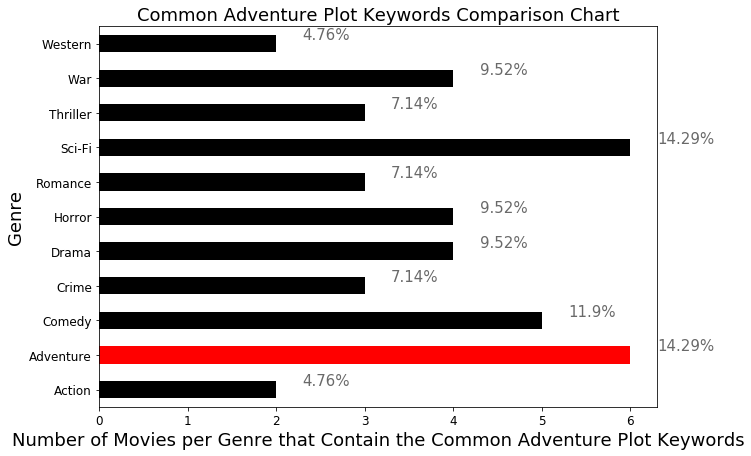

In [11]:
common_advwords = ["based", "female", "time", "survival", "wizard"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_advwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Adventure plot Keywords: based, female, time, survival, wizard"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","red","black","black","black","black",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Adventure Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Adventure Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for adventure movie plot keywords, we were able to look and see what keywords were most common in the advennture movie plot keywords. Once we received the most common adventure plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common adventure plot keywords occur mostly in adventure movies, as expected, but also tied with Sci-Fi. This may mean it is is hard to predict adventure movies correctly, solely based on keywords.

# Most Plot Keywords in Romance
Below, I am finding the popular plot keywords that occur in romance movies.

In [12]:
romance_movies_df = movie_df[movie_df["Genre"] == "Romance"]

bag_of_words_romance = (
    romance_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_romance = pd.DataFrame(list(bag_of_words_romance)).fillna(0)
tf_romance.sum().sort_values()[-15:]

time             6.0
girl             6.0
nazi             6.0
character        6.0
sex              7.0
a                7.0
marriage         8.0
film             9.0
in               9.0
of              10.0
woman           12.0
s               13.0
love            15.0
relationship    15.0
female          17.0
dtype: float64

According to this TF for romance movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the romance movie plot keywords are: "love", "female", "relationship", "marriage", "sex"

Common Romance plot Keywords: female, love, relationship, marriage, sex


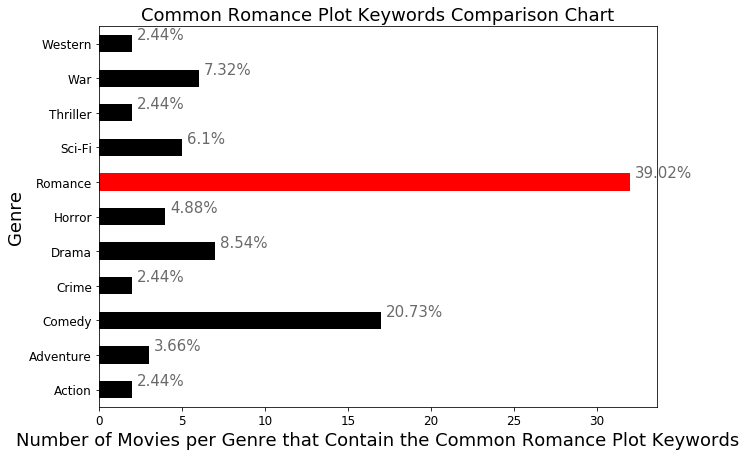

In [13]:
common_romancewords = ["love", "female", "relationship", "marriage", "sex"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_romancewords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Romance plot Keywords: female, love, relationship, marriage, sex"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "red","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Romance Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Romance Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for romance movie plot keywords, we were able to look and see what keywords were most common in the romance movie plot keywords. Once we received the most common romance plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common romance plot keywords occur mostly in romance movies, as expected. 

# Most Plot Keywords in Sci-Fi
Below, I am finding the popular plot keywords that occur in sci-fi movies.

In [14]:
scifi_movies_df = movie_df[movie_df["Genre"] == "Sci-Fi"]

bag_of_words_scifi = (
    scifi_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_scifi = pd.DataFrame(list(bag_of_words_scifi)).fillna(0)
tf_scifi.sum().sort_values()[-15:]

skirt            5.0
dystopia         7.0
relationship     7.0
memory           7.0
post             8.0
apocalypse       8.0
the             11.0
of              11.0
female          11.0
robot           11.0
travel          12.0
space           12.0
future          13.0
time            18.0
alien           20.0
dtype: float64

According to this TF for sci-fi movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the sci-fi movie plot keywords are: "love", "female", "relationship", "marriage", "sex"

Common Sci-Fi plot Keywords: alien, future, space, robot, dystopia


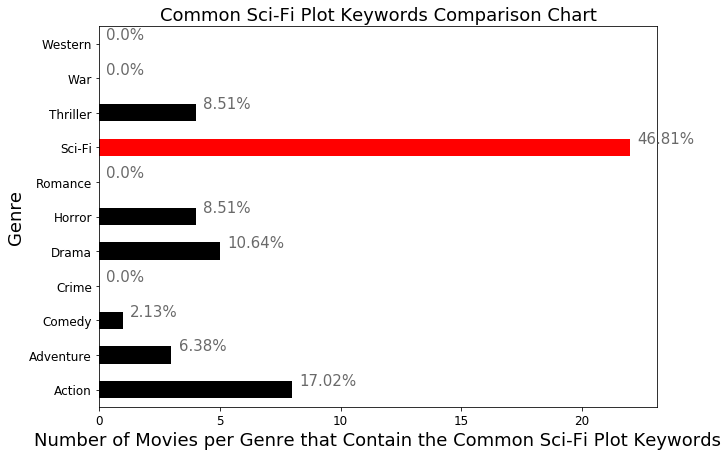

In [15]:
common_scifiwords = ["alien", "future", "space", "robot", "dystopia"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_scifiwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Sci-Fi plot Keywords: alien, future, space, robot, dystopia"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","red","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Sci-Fi Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Sci-Fi Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for scifi movie plot keywords, we were able to look and see what keywords were most common in the scifi movie plot keywords. Once we received the most common scifi plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common scifi plot keywords occur mostly in scifi movies, as expected. 

# Most Plot Keywords in Drama
Below, I am finding the popular plot keywords that occur in drama movies.

In [16]:
drama_movies_df = movie_df[movie_df["Genre"] == "Drama"]

bag_of_words_drama = (
    drama_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_drama = pd.DataFrame(list(bag_of_words_drama)).fillna(0)
tf_drama.sum().sort_values()[-15:]

to               5.0
story            5.0
american         5.0
in               5.0
gang             5.0
black            6.0
girl             6.0
based            7.0
nudity           7.0
female           7.0
boxing           7.0
on               7.0
murder           7.0
s                7.0
relationship    10.0
dtype: float64

According to this TF for drama movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the drama movie plot keywords are: "relationship", "boxing", "nudity", "black", "story"

Common Drama plot Keywords: relationship, boxing, nudity, black, story


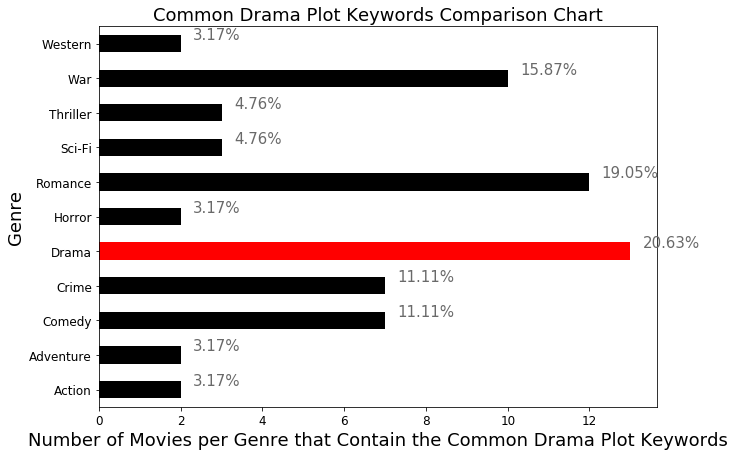

In [17]:
common_dramawords = ["relationship", "boxing", "nudity", "black", "story"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_dramawords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Drama plot Keywords: relationship, boxing, nudity, black, story"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","red","black",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Drama Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Drama Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for drama movie plot keywords, we were able to look and see what keywords were most common in the drama movie plot keywords. Once we received the most common drama plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common drama plot keywords occur mostly in drama movies, as expected. 

# Most Plot Keywords in Crime
Below, I am finding the popular plot keywords that occur in crime movies.

In [18]:
crime_movies_df = movie_df[movie_df["Genre"] == "Crime"]

bag_of_words_crime = (
    crime_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_crime = pd.DataFrame(list(bag_of_words_crime)).fillna(0)
tf_crime.sum().sort_values()[-15:]

character      7.0
gangster       7.0
gang           7.0
corruption     7.0
con            7.0
the            7.0
a              7.0
s              8.0
killer         8.0
murder         8.0
crime          8.0
in             9.0
child          9.0
on            10.0
female        11.0
dtype: float64

According to this TF for crime movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the crime movie plot keywords are: "child", "crime", "murder", "killer", "gang"

Common Crime plot Keywords: child, crime, murder, killer, gang


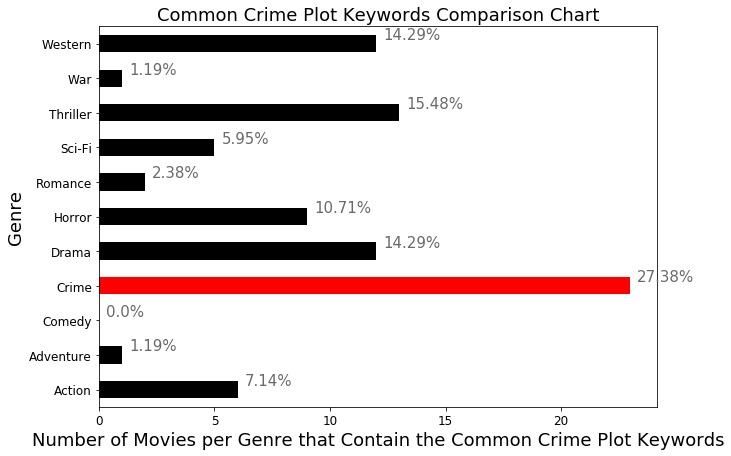

In [19]:
common_crimewords = ["child", "crime", "murder", "killer", "gang"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_crimewords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Crime plot Keywords: child, crime, murder, killer, gang"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","red","black","black",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Crime Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Crime Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for crime movie plot keywords, we were able to look and see what keywords were most common in the crime movie plot keywords. Once we received the most common crime plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common crime plot keywords occur mostly in crime movies, as expected.

# Most Plot Keywords in Thriller
Below, I am finding the popular plot keywords that occur in thriller movies.

In [20]:
thriller_movies_df = movie_df[movie_df["Genre"] == "Thriller"]

bag_of_words_thriller = (
    thriller_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_thriller = pd.DataFrame(list(bag_of_words_thriller)).fillna(0)
tf_thriller.sum().sort_values()[-15:]

police       5.0
thriller     5.0
sex          6.0
ending       6.0
secret       6.0
heist        6.0
woman        6.0
s            6.0
female       7.0
to           7.0
of           8.0
the          8.0
on          10.0
murder      11.0
a           16.0
dtype: float64

According to this TF for thriller movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the thriller movie plot keywords are: "sex", "female", "heist", "secret", "thriller"

Common Thriller plot Keywords: sex, female, heist, secret, thriller


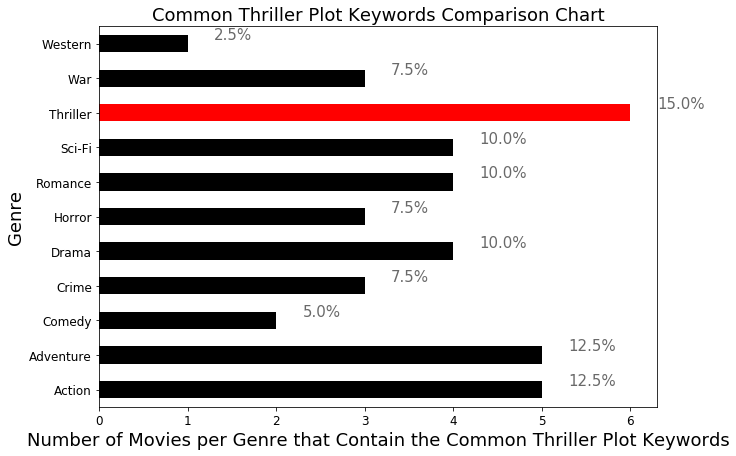

In [21]:
common_thrillwords = ["sex", "female", "heist", "secret", "thriller"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_thrillwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Thriller plot Keywords: sex, female, heist, secret, thriller"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","red","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Thriller Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Thriller Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for thriller movie plot keywords, we were able to look and see what keywords were most common in the thriller movie plot keywords. Once we received the most common thriller plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common thriller plot keywords occur mostly in thriller movies, as expected. However, the second highest occurences occur tied in Action and Adventure. This makes sense because there exists numerous movies that are both action and thriller or adventure and thriller.

# Most Plot Keywords in Comedy
Below, I am finding the popular plot keywords that occur in comedy movies.

In [22]:
comedy_movies_df = movie_df[movie_df["Genre"] == "Comedy"]

bag_of_words_comedy = (
    comedy_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_comedy = pd.DataFrame(list(bag_of_words_comedy)).fillna(0)
tf_comedy.sum().sort_values()[-15:]

woman            7.0
relationship     7.0
tramp            7.0
movie            7.0
love             7.0
in               8.0
s                8.0
of               8.0
time             9.0
character        9.0
national        11.0
registry        11.0
film            17.0
female          18.0
comedy          20.0
dtype: float64

According to this TF for comedy movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the comedy movie plot keywords are: "comedy", "movie", "registry", "love", "tramp"

Common Comedy plot Keywords: comedy, movie, registry, love, tramp


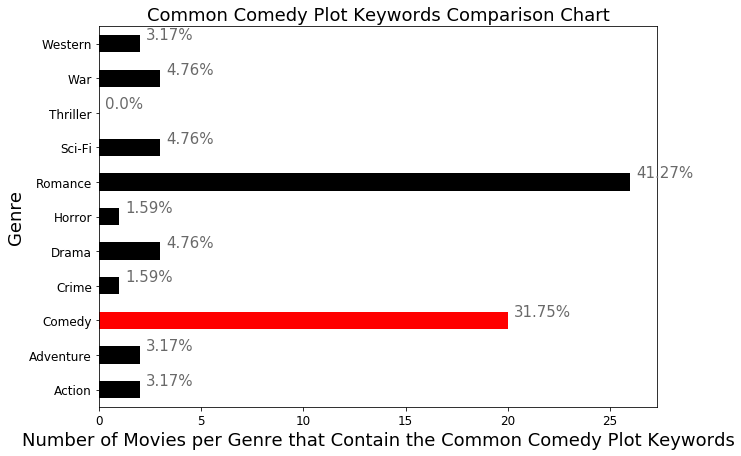

In [23]:
common_comedywords = ["comedy", "movie", "registry", "love", "tramp"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_comedywords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common Comedy plot Keywords: comedy, movie, registry, love, tramp"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","red","black","black","black",
     "black","black","black","black","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common Comedy Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common Comedy Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for comedy movie plot keywords, we were able to look and see what keywords were most common in the comedy movie plot keywords. Once we received the most common comedy plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common comedy plot keywords occur mostly in romance movies. But, it occurs second most in comedy movies. This is probably becuase most comedies are also romances. Movies with both of these as their genres are so common that there exists an unofficial genre in the real world called Rom-Coms. Hence, this could explain why the Common comedy plot key words occur mostly in Romance and second highest in comedy movies. 

# Most Plot Keywords in War
Below, I am finding the popular plot keywords that occur in war movies.

In [24]:
war_movies_df = movie_df[movie_df["Genre"] == "War"]

bag_of_words_war = (
    war_movies_df["Plot Keywords"].
    str.lower().
    str.replace("[^A-Za-z\s]", "").
    str.split()
).apply(Counter)

tf_war = pd.DataFrame(list(bag_of_words_war)).fillna(0)
tf_war.sum().sort_values()[-15:]

a            6.0
american     7.0
s            7.0
two          8.0
vietnam      8.0
battle       8.0
us           9.0
military     9.0
world       10.0
female      11.0
army        11.0
nazi        12.0
soldier     13.0
of          13.0
war         30.0
dtype: float64

According to this TF for war movies above, it seems like the most common plot keywords (if we take out common words like "the", "and", etc.) in the war movie plot keywords are: "war", "soldier", "nazi", "amry", "military"

Common War plot Keywords: war, soldier, nazi, army, military


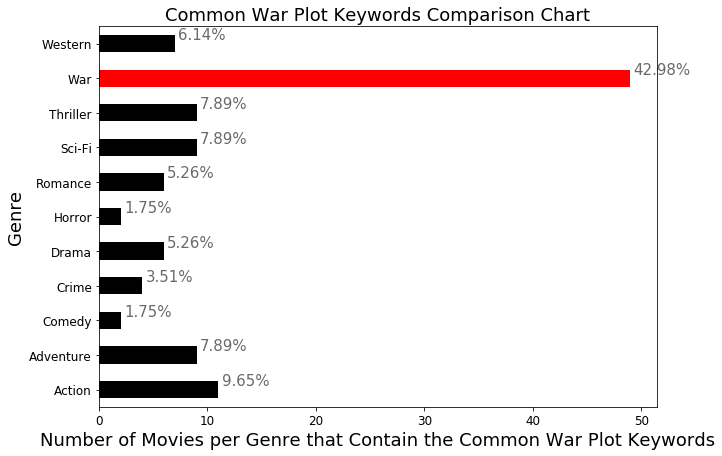

In [25]:
common_warwords = ["war", "soldier", "nazi", "amry", "military"]
counter = []
for text,genre in zip(movie_df["Synopsis"],movie_df["Genre"]):
    text = text.lower().replace("[^A-Za-z\s]", "")
    count=0
    for word in text.split(" "): 
        if(word in common_warwords):
            count+=1
    counter.append(count)
movie_df["Word Count"] = counter
start = "\033[1m"
end = "\033[0;0m"
print(start+"Common War plot Keywords: war, soldier, nazi, army, military"+end)
word_count = movie_df.groupby("Genre")["Word Count"].sum()
c = ["black","black","black","black","black","black",
     "black","black","black","red","black"]
ax = word_count.plot.barh(figsize=(10,7),
                         fontsize = 12,color=c)
ax.set_xlabel("Number of Movies per Genre that Contain the Common War Plot Keywords"
              , fontsize=18)
ax.set_ylabel("Genre"
              , fontsize=18)
ax.set_title("Common War Plot Keywords Comparison Chart", fontsize=18)
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# Results
From the looking at the plot keyword frequencies for war movie plot keywords, we were able to look and see what keywords were most common in the war movie plot keywords. Once we received the most common war plot keywords, we created a bar graph displaying how these words compared to the the other genres. According to the graph above, the common war plot keywords occur mostly in war movies, as expected. 

## Overall Conclusion
After looking at all the results above, we find that the common plot keywords for each genre occur only in that genre for most genres. Hence, we can conclude that we could identify movie genre based on the plot key words and that there is a relationship between plot keywords and movie genre.


each genre has common words in their synopsis and there is a correlation between the words that occur in the s
ynopsis and the movie genre.